# importing libs 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# import data

In [3]:
data = pd.read_csv('bank.csv')


# Data exploration

In [4]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  cellular   19   oct        79         1     -1         0  unknown  no   
1  cellular   11   may       220         1    339         4  failure  no   
2  cellular   16   apr       185         1    330         1  failure  no   
3   unknown    3   jun       199         4     -1         0  unknown  no   
4   unknown    5   may       226         1     -1         0  unknown  no   

   Unnamed: 17  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Unnamed: 17'],
      dtype='object')

In [6]:
data.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  Unnamed: 17  
count  4521.000000  4521.000000          0.0  
mean     39.766645     0.542579          NaN  
std     100.121124     1.693562          NaN  
min      -1.000000     0.000000          NaN  
25%      -1.000000     0.000000          NaN  
50%      -1.000000     0.000000          NaN  
75%      -1.000000     0.000000          NaN  
max     871.000000    25.000000          NaN

In [7]:
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
Unnamed: 17    float64
dtype: object

In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
Unnamed: 17    4521
dtype: int64

In [9]:
data = data.drop(['Unnamed: 17'],axis = 1)


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# relations in data 

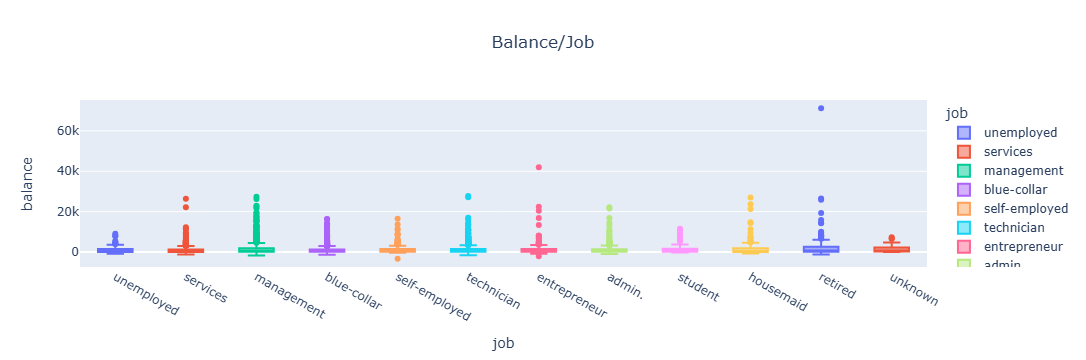

In [11]:
# Box plot for job and balance
import plotly.express as px
fig = px.box(data,x='job',y = 'balance',color='job', title='Balance/Job')
fig.update_layout(title ={ 
    'x' : 0.5,
    'y' : 0.9,
    'xanchor': 'center',
    'yanchor': 'top'
    })
fig.show()

([<matplotlib.patches.Wedge at 0x1fb58a97e50>,
 [Text(-0.40065506308889415, 1.0244391248001192, 'married'),
  Text(0.006497153578329398, -1.0999808121032748, 'single'),
  Text(1.0267877161499914, -0.3945972452558238, 'divorced')],
 [Text(-0.21853912532121497, 0.5587849771637013, '61.9%'),
  Text(0.0035439019518160348, -0.5999895338745135, '26.5%'),
  Text(0.5600660269909044, -0.21523486104863113, '11.7%')])

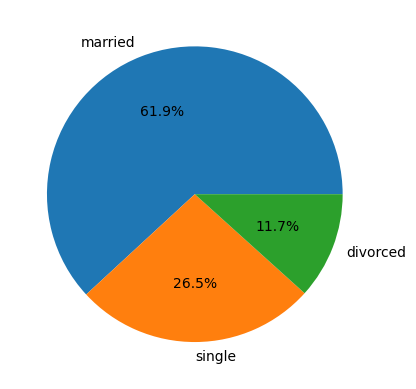

In [13]:
# Pie chart for identify the ratio of every marital state 
marital_chart = data['marital'].value_counts()
plt.pie(marital_chart,labels=marital_chart.index,autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x1fb58ab1010>,
 [Text(-0.2265340801705853, 1.076421065625003, 'yes'),
  Text(0.22653397938877062, -1.0764210868346495, 'no')],
 [Text(-0.12356404372941014, 0.5871387630681835, '56.6%'),
  Text(0.12356398875751123, -0.5871387746370815, '43.4%')])

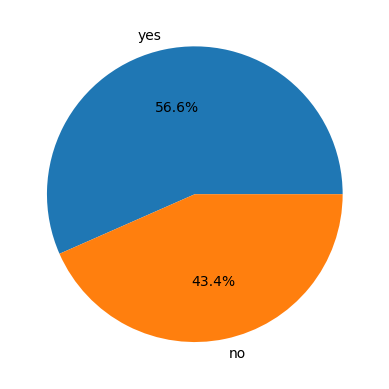

In [14]:
marital_chart = data['housing'].value_counts()
plt.pie(marital_chart,labels=marital_chart.index,autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x27c945c2e10>,
 [Text(0.6205089062538627, 0.9082778744743457, 'may'),
  Text(-0.8355647795738061, 0.715423999552557, 'jul'),
  Text(-1.0729165934021103, -0.24259015561726868, 'aug'),
  Text(-0.5651543737918298, -0.9437163418019023, 'jun'),
  Text(0.10950658866669367, -1.0945356581850514, 'nov'),
  Text(0.5969538285069507, -0.9239297195300595, 'apr'),
  Text(0.8827664717387878, -0.656295174729978, 'feb'),
  Text(1.0206355904889517, -0.4102474758329039, 'jan'),
  Text(1.0725784380202668, -0.2440809175130356, 'oct'),
  Text(1.0904265339061068, -0.14481013139112348, 'sep'),
  Text(1.0978970254640914, -0.06798618592846911, 'mar'),
  Text(1.0998937712650083, -0.015286985721125936, 'dec')])

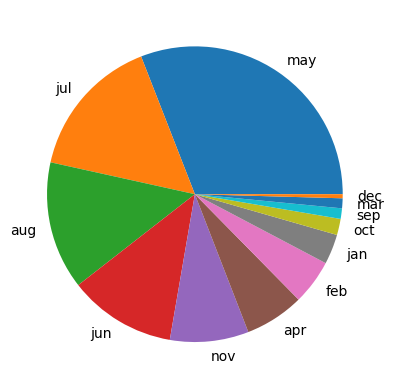

In [79]:
month_pie = data['month'].value_counts()
plt.pie(month_pie.values,labels=month_pie.index)

<BarContainer object of 4 artists>

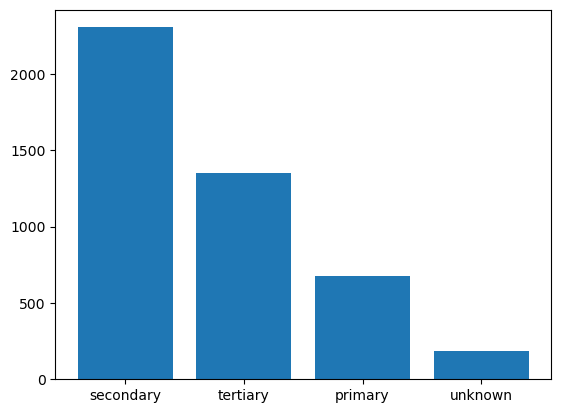

In [15]:
educatin_bar = data['education'].value_counts()
plt.bar(x = educatin_bar.index,height=educatin_bar.values)


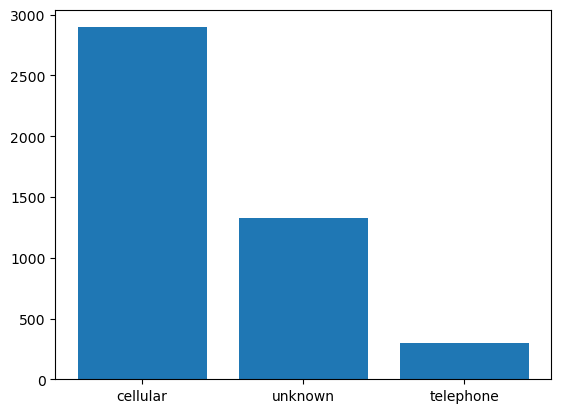

In [16]:
contact_chart = data['contact'].value_counts()
plt.bar(x = contact_chart.index, height = contact_chart.values,)
plt.show()

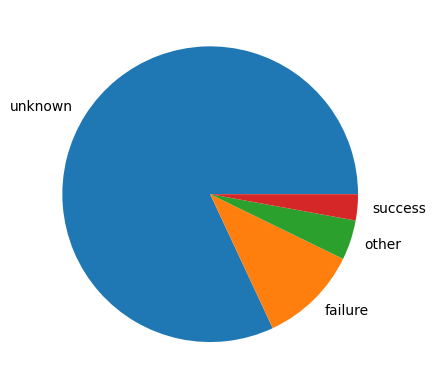

In [17]:
contact_chart = data['poutcome'].value_counts()
plt.pie(contact_chart.values, labels =  contact_chart.index,)
plt.show()

C:\goodProgramms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\goodProgramms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\goodProgramms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\goodProgramms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\goodProgramms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

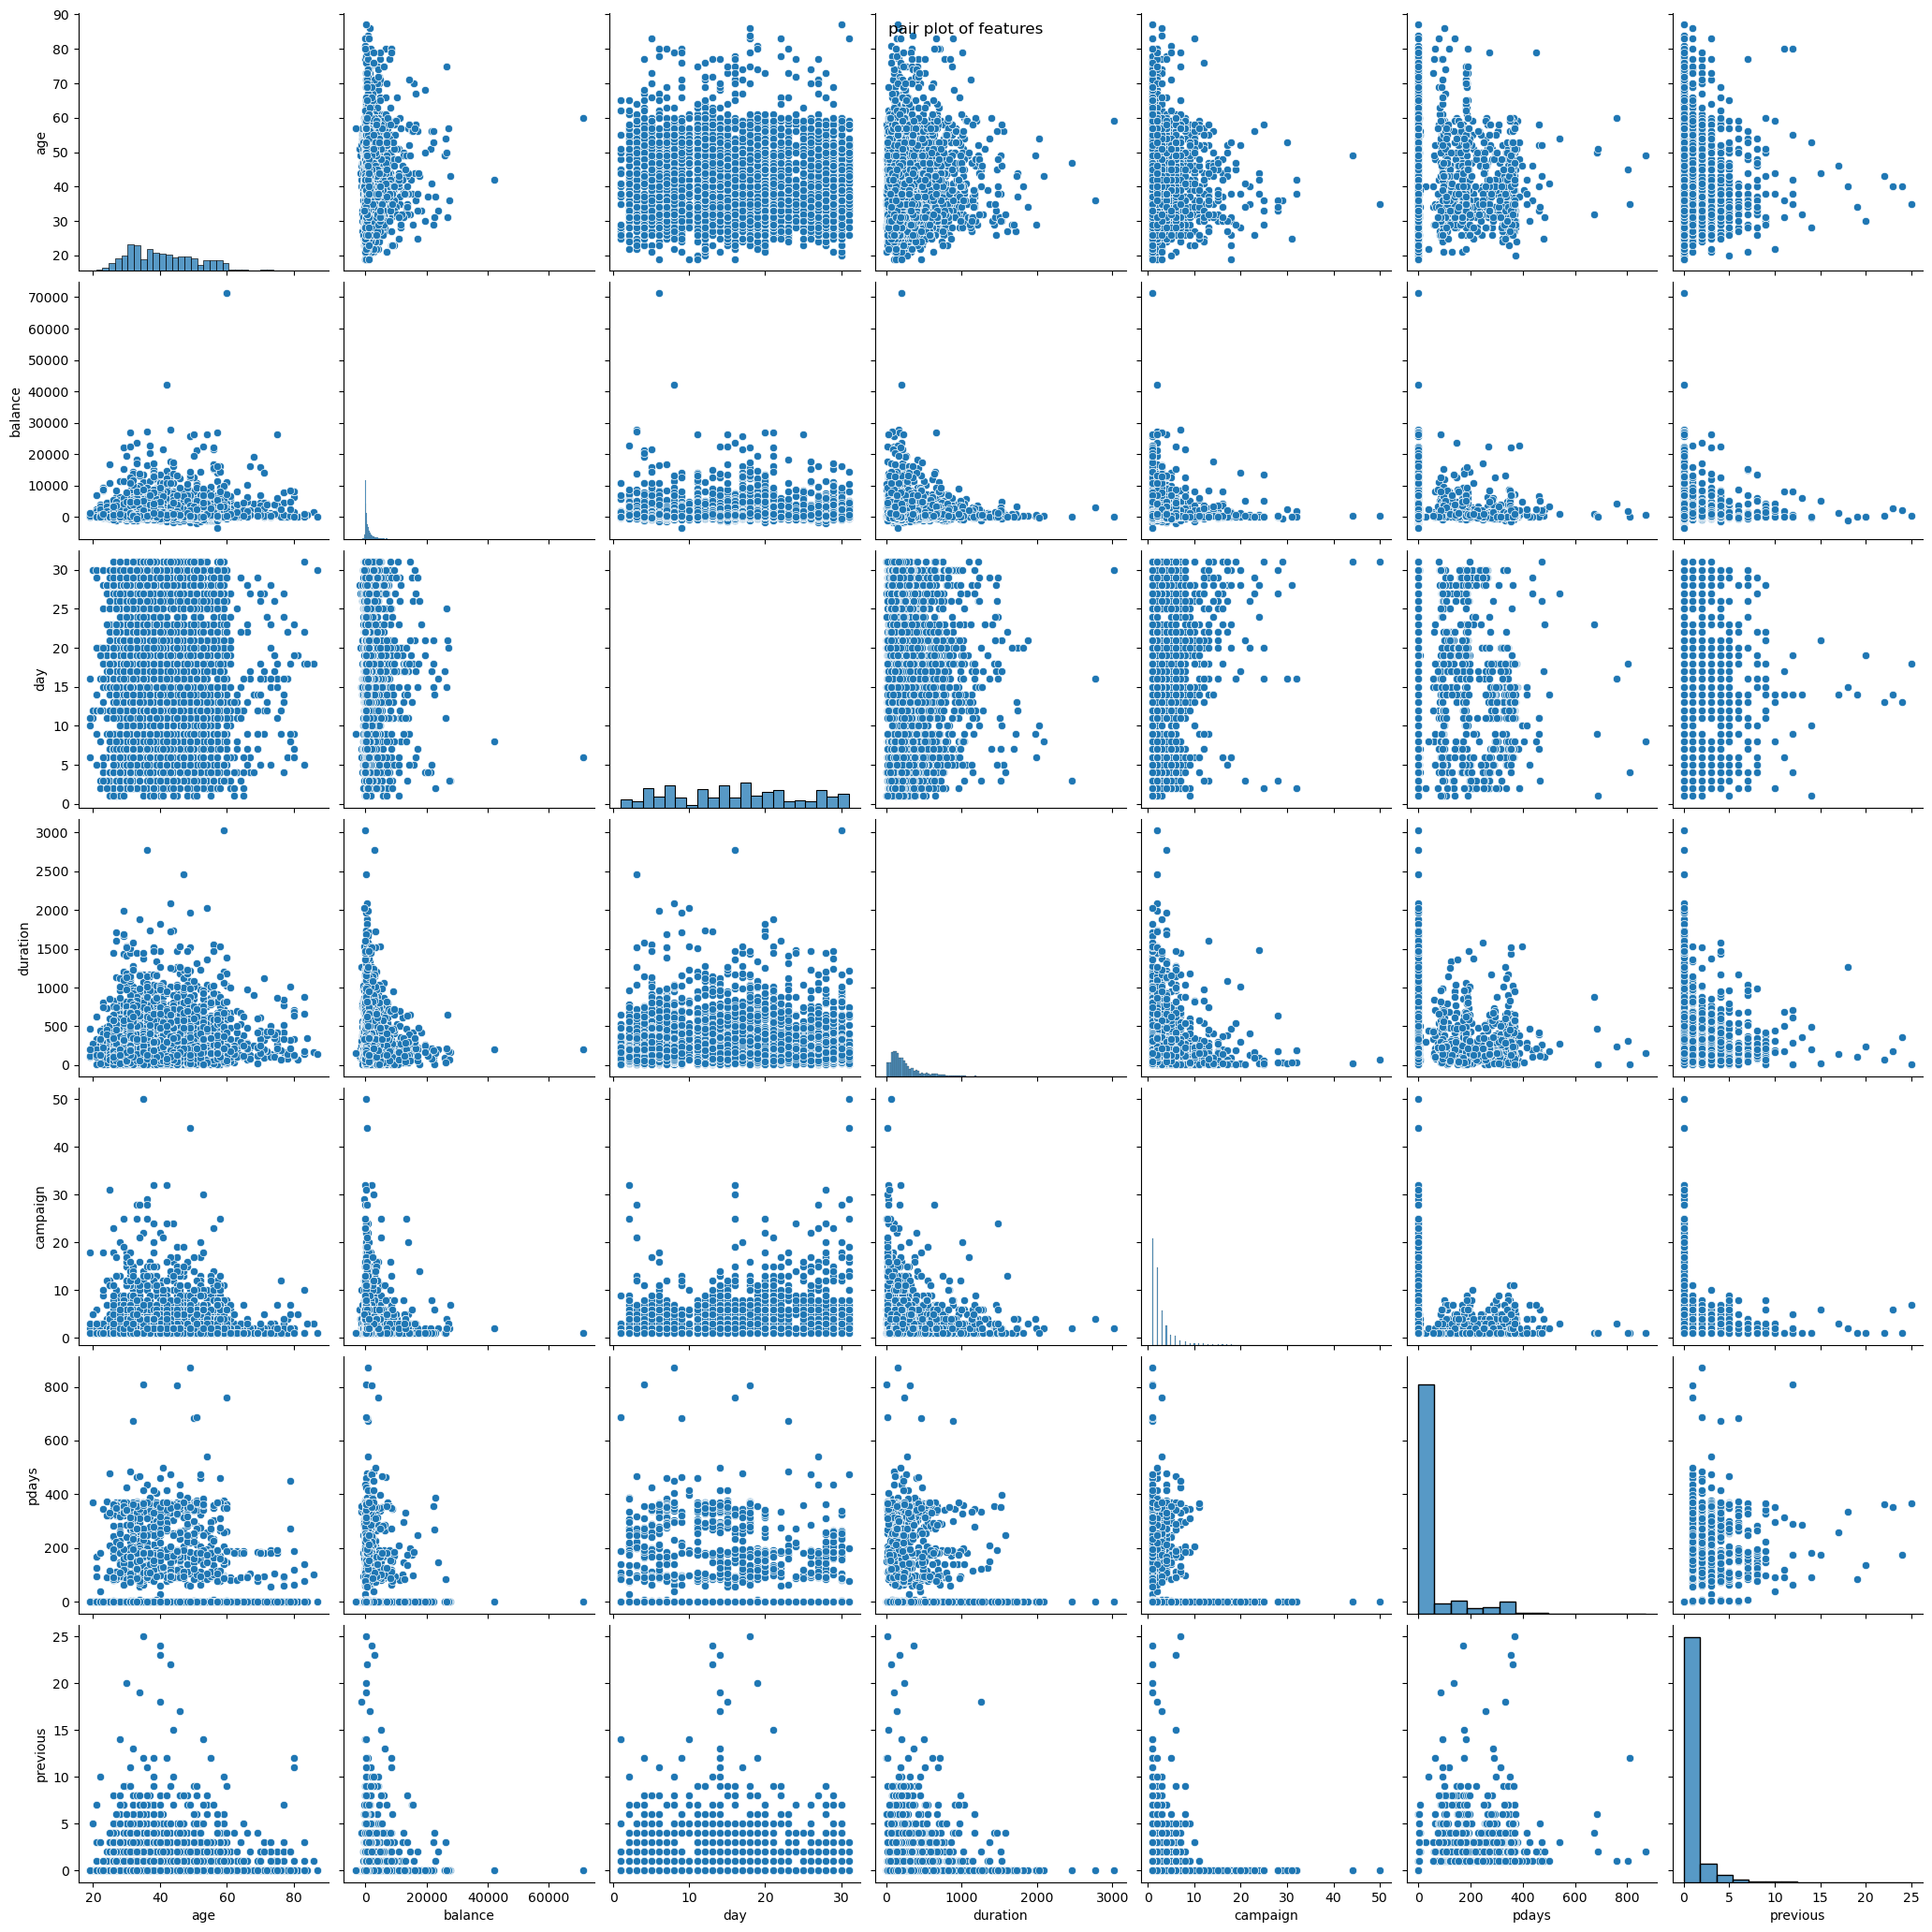

In [18]:
sns.pairplot(data,height=3)
plt.suptitle('pair plot of features')
plt.show()

# change categorical data to numbers 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == object:
        data[col] = le.fit_transform(data[col])

# discover correlation between data columns 

<Axes: >

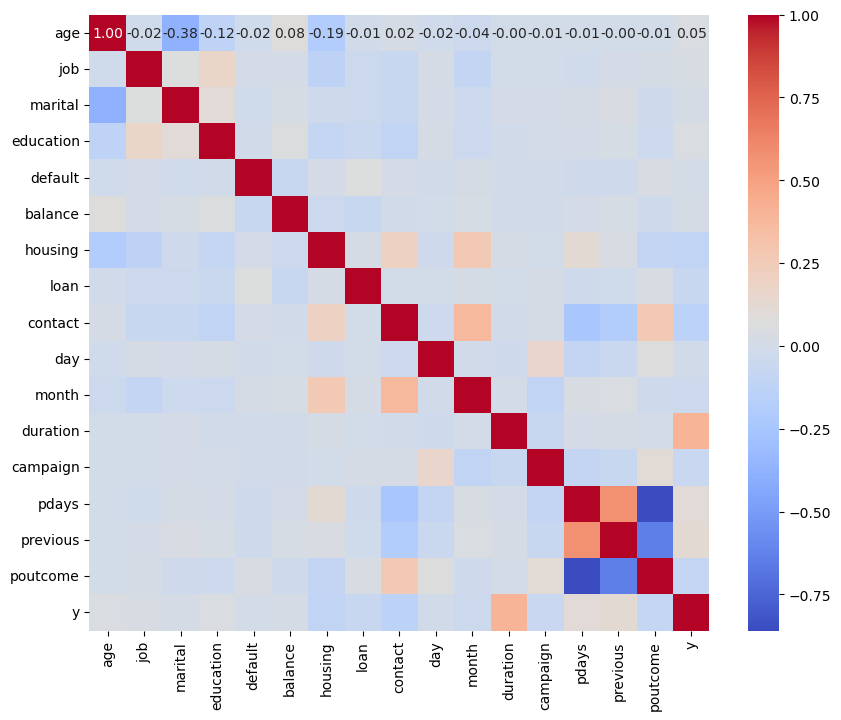

In [86]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',fmt = ".2f")

# dividing data to the dependent and independent vars 

In [20]:

x = data.drop('y',axis=1)
y= data['y']

# training classificaton models

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# feature scaling 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix

def classifier_acc(classifier):
    # Fit the classifier
    classifier.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test)
    
    # Calculate accuracy and confusion matrix
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return acc, cm

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [SVC(), 
               LogisticRegression(), 
               RandomForestClassifier(), 
               GradientBoostingClassifier(),
               DecisionTreeClassifier(), 
               KNeighborsClassifier(),
               GaussianNB()
              ]
results = []
for classifier in classifiers:
    acc,cm = classifier_acc(classifier)
    results.append({
        'classifier_algorithm':type(classifier).__name__,
        'accurecy' : acc  ,
        'confusion matrix':cm}
                  )

print(f'{results} \n')

[{'classifier_algorithm': 'SVC', 'accurecy': 0.8806629834254144, 'confusion matrix': array([[781,  12],
       [ 96,  16]], dtype=int64)}, {'classifier_algorithm': 'LogisticRegression', 'accurecy': 0.8784530386740331, 'confusion matrix': array([[773,  20],
       [ 90,  22]], dtype=int64)}, {'classifier_algorithm': 'RandomForestClassifier', 'accurecy': 0.8939226519337017, 'confusion matrix': array([[775,  18],
       [ 78,  34]], dtype=int64)}, {'classifier_algorithm': 'GradientBoostingClassifier', 'accurecy': 0.8917127071823204, 'confusion matrix': array([[768,  25],
       [ 73,  39]], dtype=int64)}, {'classifier_algorithm': 'DecisionTreeClassifier', 'accurecy': 0.8828729281767956, 'confusion matrix': array([[750,  43],
       [ 63,  49]], dtype=int64)}, {'classifier_algorithm': 'KNeighborsClassifier', 'accurecy': 0.8895027624309392, 'confusion matrix': array([[782,  11],
       [ 89,  23]], dtype=int64)}, {'classifier_algorithm': 'GaussianNB', 'accurecy': 0.8165745856353591, 'confus

# determind the max algorithm accurecy using linear search 

In [93]:
max_accurecy = 0
max_classifier_accurecy = 'logistic'
for ele in results:
    if ele['accurecy']>max_accurecy:
        max_accurecy = ele['accurecy']
        max_classifier_accurecy = ele['classifier_algorithm']

print(f'the max accurey : {max_accurecy*100 : .2f} % when using : {max_classifier_accurecy} classifier algorithm ')

the max accurey :  89.39 % when using : RandomForestClassifier classifier algorithm 
